## Dataset: https://www.kaggle.com/datasets/imoore/age-dataset

### Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the data

In [3]:
df = pd.read_csv('AgeDataset-V1.csv')
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


### Data Cleaning

In [7]:
df.shape # Get (row count, column count)

(1223009, 10)

In [8]:
df.info() # Get the dataset columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


#### I am going to remove Id column cause I don't need it for our analysis

In [11]:
df.drop(['Id'], 1,inplace=True)

g:\p\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [21]:
# success in deleting the column 'Id'
print('Updated Shape: ',df.shape)

Updated Shape:  (1223009, 9)


#### Its important to check null values in dataset

In [22]:
df.isna().sum()

Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

#### Percentage of null values in each column

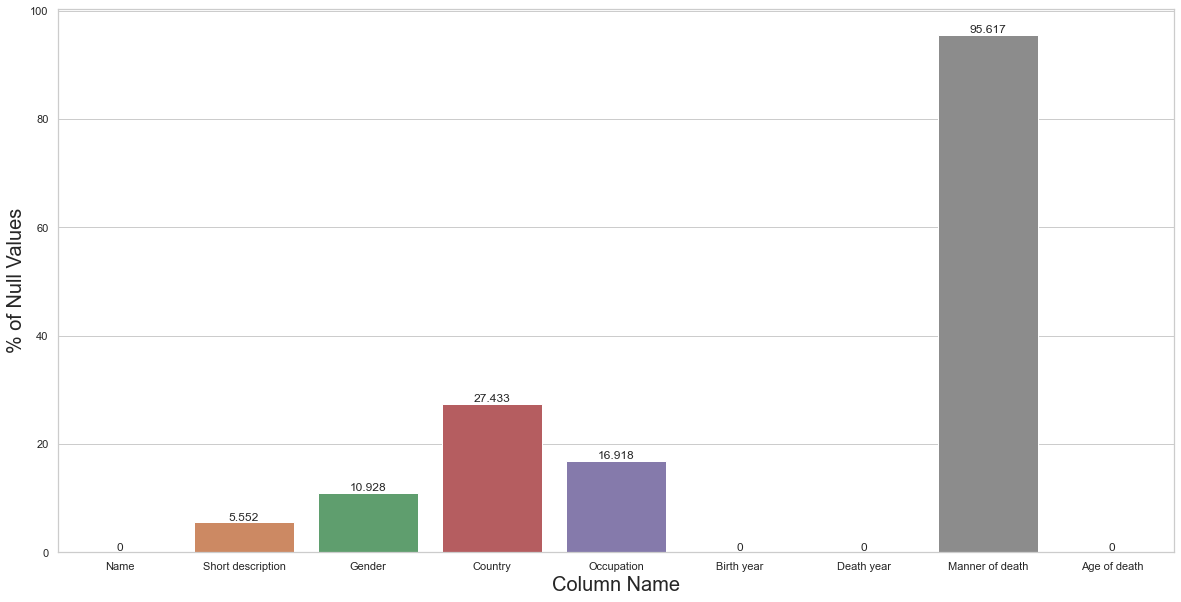

In [34]:
col_names = list(df.isna().sum().keys())
col_null_count = list(df.isna().sum().values)
percentage_null_value = [round((x/df.shape[0])*100,3) for x in col_null_count]
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
p = sns.barplot(x=col_names, y=percentage_null_value)
p.set_xlabel("Column Name", fontsize = 20)
p.set_ylabel("% of Null Values", fontsize = 20)
for i in p.containers:
    p.bar_label(i,)

#### From above chart we can see that 95 percent of manner of death data is null

#### So, According to me we should not delete or replace any row with null value as it looks important data
    *  Only Famous Personality people Manner of death are present

In [35]:
df['Country'].value_counts()

United States of America                                       152761
Germany                                                         95081
France                                                          78666
United Kingdom; United Kingdom of Great Britain and Ireland     29684
Sweden                                                          26915
                                                                ...  
Nazi Germany; Socialist Federal Republic of Yugoslavia              1
Lithuania; Belarus                                                  1
Spain; Kingdom of England                                           1
France; United Kingdom; Russian Empire                              1
El Salvador; British Empire                                         1
Name: Country, Length: 5961, dtype: int64

In [36]:
'United States of America '.split('; ')

['United States of America ']

In [64]:
'''
    Creating the citizenship column which tells the no of citizenship one holds,
    for nan value which have datatype float i have given 0
'''
df['Citizenship'] = df.apply(lambda x: 0 if type(x.Country) == float else len(x.Country.split('; ')), axis=1)

In [65]:
df.head()

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Citizenship
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,2
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,1
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,1
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,2
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,2


###  This is quite interesting. Look what I have found the creator of dataset. I hope he is Good with health. I will delete this record for now 😂

In [67]:
df[df['Death year'].isna()]

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Citizenship
361,Issa Annamoradnejad,Creator of this dataset,Male,NaN,NaN,1992,NaN,NaN,NaN,0


#### For that, first I will create dataset

In [68]:
df1 = df.copy()

In [69]:
df1.dropna(axis=0, subset=['Death year'], inplace = True)

In [71]:
df1.isna().sum()

Name                       0
Short description      67900
Gender                133646
Country               335508
Occupation            206913
Birth year                 0
Death year                 0
Manner of death      1169405
Age of death               0
Citizenship                0
dtype: int64

### Cheers to Dataset Creator 👍

In [72]:
df1.head()

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Citizenship
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,2
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,1
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,1
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,2
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,2


#### Changing the dataset of some columns

In [73]:
df1['Death year'] = df1['Death year'].astype('int')
df1['Age of death'] = df1['Age of death'].astype('int')

In [74]:
df1.head()

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Citizenship
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67,2
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49,1
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56,1
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NaN,35,2
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NaN,57,2


### Data Analysis

In [75]:
df1['Age of death'].value_counts()

80     32837
77     32535
78     32503
76     32484
74     32338
       ...  
122        1
126        1
130        1
121        1
127        1
Name: Age of death, Length: 130, dtype: int64

Text(0.5, 1.0, 'Death by percentage in different age range')

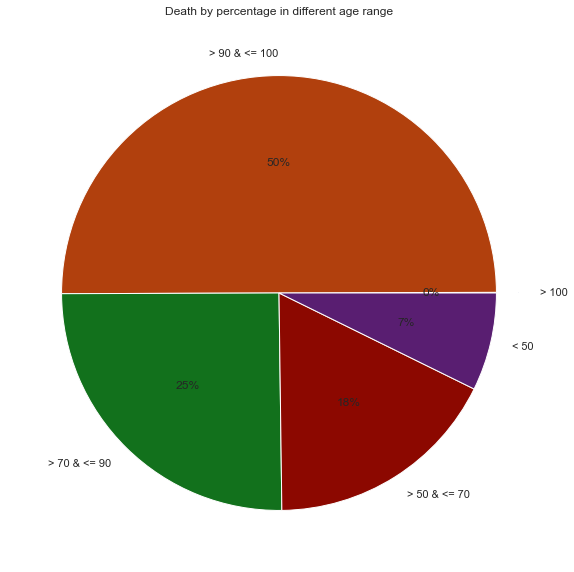

In [105]:
plt.figure(figsize=(20,10))

count = [df1[df1['Age of death']>100].shape[0],df1.shape[0] - df1[(df1['Age of death']<=100) & (df1['Age of death']>90)].shape[0],
         df1[(df1['Age of death']<=90) & (df1['Age of death']>70)].shape[0], 
         df1[(df1['Age of death']<=70) & (df1['Age of death']>50)].shape[0],
         df1.shape[0] - (df1[df1['Age of death']>100].shape[0] + df1[(df1['Age of death']<=100) & (df1['Age of death']>90)].shape[0]
                        + df1[(df1['Age of death']<=70) & (df1['Age of death']>50)].shape[0]
                         +df1[(df1['Age of death']<=90) & (df1['Age of death']>70)].shape[0])
        ]
# total_people = df1.shape[0]
age = ['> 100', '> 90 & <= 100','> 70 & <= 90', '> 50 & <= 70', '< 50']
explode = [0.1, 0, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(count, labels=age, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title("Death by percentage in different age range")

In [108]:
df1['Age of death'][df['Age of death']>100].count()
print('Percentage of People died with more then 100 Age: ',(df1['Age of death'][df['Age of death']>100].count()/df1.shape[0])*100)

Percentage of People died with more then 100 Age:  0.09599283079096785


### From above we can see the distribution of death of a person in particular age range

In [113]:
Gender = list(df1['Gender'].value_counts().keys())
Count = list(df1['Gender'].value_counts().values)

Text(0.5, 1.0, 'Count on people with Gender group')

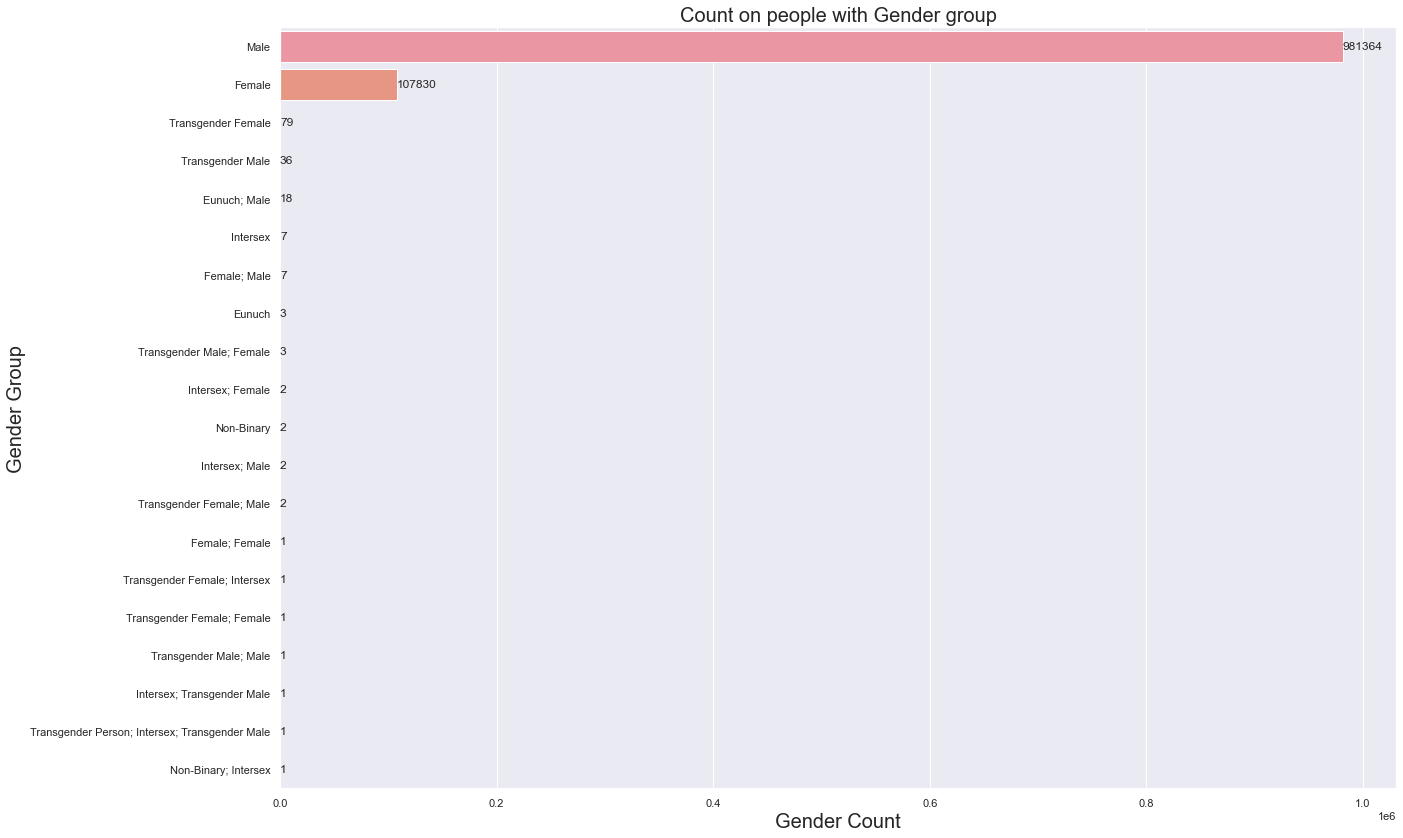

In [128]:
plt.figure(figsize=(20,14))
sns.set_theme(style="darkgrid")
p = sns.barplot(x=Count, y=Gender)
p.set_xlabel("Gender Count", fontsize = 20)
p.set_ylabel("Gender Group", fontsize = 20)
for i in p.containers:
    p.bar_label(i,)
plt.title("Count on people with Gender group", fontsize = 20)

In [129]:
df1['Manner of death'].unique()

array(['natural causes', 'homicide', nan, 'suicide', 'accident',
       'capital punishment', 'death in battle', 'unnatural death',
       'extrajudicial killing', 'capital punishment; suicide',
       'homicide; natural causes', 'capital punishment; homicide',
       'euthanasia', 'suicide; natural causes',
       'capital punishment; unnatural death', 'epilepsy', 'complication',
       'summary execution', 'suicide; accident',
       'suicide; homicide; accident', 'suicide; homicide; natural causes',
       'suicide; unfortunate accident', 'gunshot', 'internal bleeding',
       'cardiac arrest; natural causes', 'accident; natural causes',
       'Pospíšil', 'Category:People executed by firing squad', 'era',
       'homicide; regicide', 'capital punishment; torture',
       'maternal death', 'strain', 'Eastern Front of World War II',
       'sleep apnea', 'suicide attack', 'Şəhadət', 'lynching',
       'homicide; strangling', 'killing', 'schizophrenia',
       'homicide; ballistic tra

In [136]:
for i in np.array(df1['Manner of death'].unique()):
    if i != 'nan':
        print(f'Died by {i}:',list(df1['Name'][df1['Manner of death']==i].unique()),'\n')

Died by natural causes: ['George Washington', 'Douglas Adams', 'Jean-François Champollion', 'Claude Monet', 'Elvis Presley', 'Louis IX of France', 'Augusto Pinochet', 'Bob Marley', 'Carl Sagan', 'Georges Brassens', 'Arthur Rimbaud', 'Charles Baudelaire', 'Stendhal', 'Vladimir Vysotsky', 'Napoleon', 'Louis Pasteur', 'Giuseppe Garibaldi', 'Nicolaus Copernicus', 'Molière', 'Jean Racine', 'Paul Verlaine', 'Leonardo da Vinci', 'Juan Antonio Rios', 'Mikhail Bulgakov', 'Andrei Rublev', 'Pedro Aguirre Cerda', 'Arturo Alessandri', 'Andrei Tarkovsky', 'Joseph Stalin', 'Joseph Brodsky', 'Aristotle', 'Charlie Chaplin', 'Józef Piłsudski', 'Franz Kafka', 'Jorge Luis Borges', 'Harry Mulisch', 'Albert Einstein', 'Pedro I of Brazil', 'John Bardeen', 'John Paul II', 'Andrei Sakharov', 'France Prešeren', 'Alessandro Manzoni', 'Jean-Baptiste Lully', 'Carlo Azeglio Ciampi', 'Kofi Annan', 'Kurt Waldheim', 'Frédéric Chopin', 'Trygve Lie', 'Blaise Pascal', 'Pedro Montt', 'Aníbal Zañartu', 'Federico Errázuriz 

Died by death in battle: ['Osama bin Laden', 'Wolf-Dietrich Wilcke', 'Max Ritter von Müller', 'Wilhelm Frankl', 'Gustav Kieseritzky', 'Johann Tserclaes, Count of Tilly', 'Harold Godwinson', 'Adolf of Nassau', 'Pyrrhus', "Henri de la Tour d'Auvergne, Vicomte de Turenne", 'Alexandros I of Epirus', 'Gotse Delchev', 'Richard Montgomery', 'Ashikaga Yoshiteru', 'Areus I', 'Mustafa Bin Dardef', 'Hervé de Portzmoguer', 'Louis Charles Delescluze', 'Estácio de Sá', 'Ivan Panfilov', 'Taira no Masakado', 'Edward Pakenham', 'Martti Lappalainen', 'Jamal Ahmad Mohammad Al Badawi', 'Mohamed Mahmoud', 'Marcin Kalinowski', 'Luis Firmín de Carvajal, Conde de la Unión', 'Hatakeyama Shigetada', 'Jean-Baptiste Muiron', "Jean de Suarez d'Aulan", 'Maurício Grabois', 'Pierre Charles Pouzet', 'Vasil Chekalarov', 'Giulio Martinat', 'James Bonham', 'Fedir Shchus', 'Abdul Baset Al-Sarout', 'Adolphe Reinach', 'Alaa Abdulkareem Fartusi', 'Alan Pearsall', 'Alex McDade', 'Alexander D. Shimkin', 'Alexander Scammell', '

Died by capital punishment; suicide: ['Qin Er Shi', 'Sima Lun', 'Emperor Gong of Song', 'Zhu Yujian', 'Lady Zhen', 'Empress Mao', 'Albert Richter', 'Liu Feng', 'Princess Taiping', 'Zhang Xiu', 'Cui Yan', 'Sun Fen', 'Sima Ying', 'Meng Tian', 'Sun He', 'Empress Xu', 'Fusu', 'Tian Feng', 'Du Rangneng', 'John Somerville', 'Yang Fuqing', 'Mykola Skrypnyk', 'Princess Gaoyang', 'Dou Can', 'Fu Youyi', 'Xue Ji', 'Li Chengmei', 'Li Rong', 'Li Tan', 'Li Ying', 'Liu Chuyu', 'Liu Yan', 'Lu Yi', 'Pei Shu', 'Song Zhiwen', 'Wang Tuan', 'Xiao Gou', 'impératrice Liwenzhen', '沈众', '蕭惠休', 'Yu Zhong', 'Lu Rui'] 

Died by homicide; natural causes: ['Margot Frank'] 

Died by capital punishment; homicide: ['Yang Tong', 'Gustav Ritter von Kahr', 'Erich Mühsam', 'Edgar Julius Jung', 'Franz Kutschera', 'Emil Sembach', 'Karl Ludwig Freiherr von und zu Guttenberg', 'Roxana', 'Zhao Erfeng', 'Igor of Kiev', 'Wang Yun', 'Louis II of Lorraine, cardinal of Guise', 'Grigori Sokolnikov', 'Antal Szerb', 'Aleksandr Mikhail

Died by magnicide: ['Sylvanus Epiphanio Olympio'] 

Died by suicide; nan: ['Mark Lombardi'] 

Died by capital punishment; breaking wheel: ['Frederick of Isenberg'] 

Died by retreat from Russia: ['Michel-Joseph Gebauer'] 

Died by Battle of Maserfield: ['Oswald of Northumbria'] 

Died by ballistic trauma: ['William Richard Tolbert', 'Gonzalo Gaviria', 'Rosalie Gicanda', 'John Jairo Arias'] 

Died by war: ['Konstantinos Tsiklitiras', 'García Ordóñez', 'James Douglas, Lord of Douglas', 'William Gascoigne', 'Jaroslav Novotný', 'Guillermo García y García', 'François-Hippolyte Jaubert', 'José Oriol Canals Farriols'] 

Died by accident; bull: ['Manolete'] 

Died by dogfight: ['Adolphe Pégoud', 'Albert Littolff', 'Albert Rapilly', 'Jacques Goüin'] 

Died by suicide; suicide by poisoning with drugs: ['José Antonio Ramos Sucre'] 

Died by deliberate murder: ['Enrique Angelelli', 'Ana Orantes'] 

Died by suicide; substance dependence: ['Brad Davis'] 

Died by accident; occupational injury: ['Lou

### From above we can see the list of names for there respective manner of death leaving nulls

### We can see paterns: like Died by capital punishment; suicide and Died by capital punishment; homicide are likely to be from History of China

Text(0.5, 1.0, 'Top 15 Famous people Occupation')

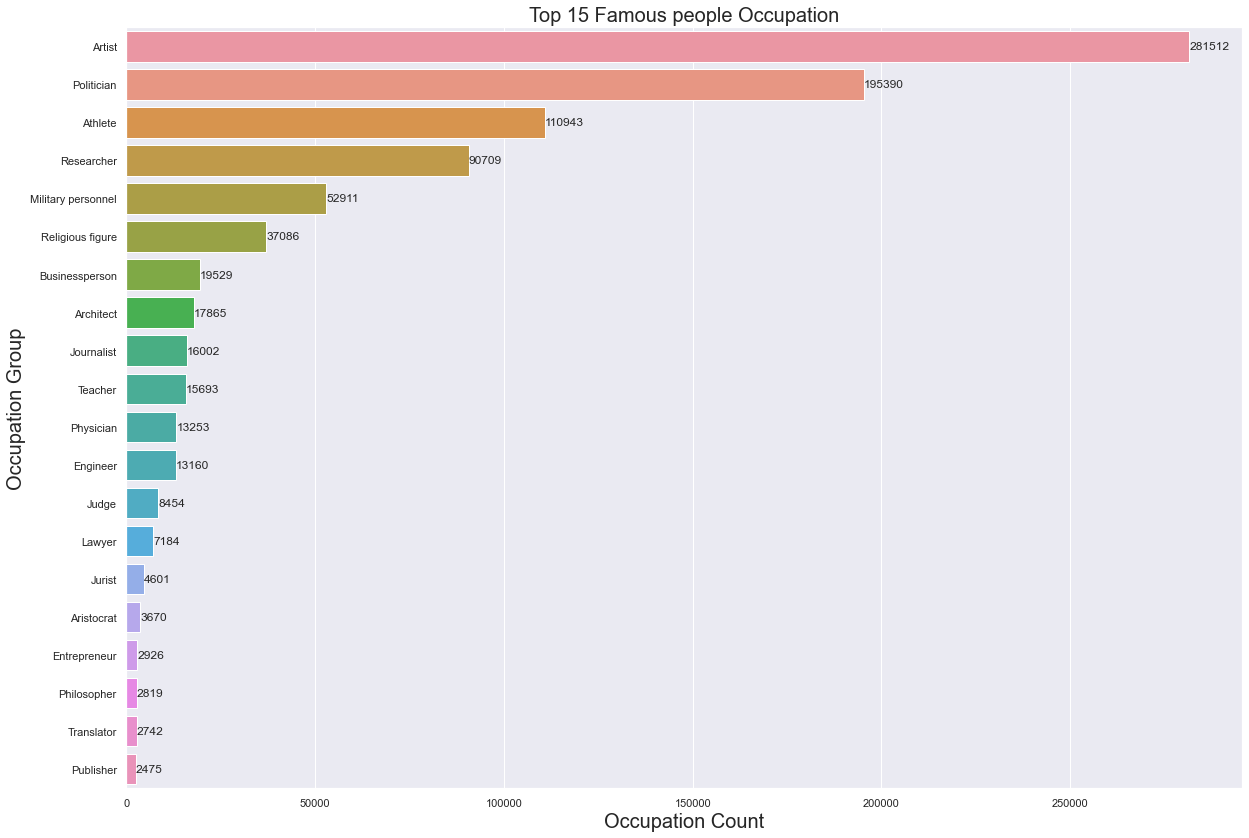

In [146]:
Occupation = list(df1['Occupation'].value_counts()[:20].keys())
Occupation_count = list(df1['Occupation'].value_counts()[:20].values)
plt.figure(figsize=(20,14))
sns.set_theme(style="darkgrid")
p = sns.barplot(x=Occupation_count, y=Occupation)
p.set_xlabel("Occupation Count", fontsize = 20)
p.set_ylabel("Occupation Group", fontsize = 20)
for i in p.containers:
    p.bar_label(i,)
plt.title("Top 15 Famous people Occupation", fontsize = 20)

### From above Bar Chart we can see that which occupation create more famous people
    *  Artists Top the list

<h1></h1>

<h1>-------------------XXX-----------------------</h1>

## Thank You........😊
### Please 👍 and 💬 If you like my Analysis